In [7]:
import sys
import pathlib
cwd = pathlib.Path().cwd()
sys.path.append(cwd.parent.as_posix())
data_folder = cwd.parent.joinpath('data')

import pickle
import datetime as dt
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, ConfusionMatrixDisplay

## check saved model

In [9]:
# check metric
model = pickle.load(open('model.pkl', 'rb'))
# model = dill.load(open('model.dill', 'rb'))

# select part of train
train = pd.read_csv(data_folder.joinpath('data_train.csv')).drop('Unnamed: 0', axis=1)
train = train[train['buy_time'] >= dt.datetime.fromisoformat('2018-11-19').timestamp()]

data = train.drop('target', axis=1)
target = train['target']

predicts = model.predict(data)
print(f'f1_score: {f1_score(target, predicts, average="macro")}\n'
      f'precision: {precision_score(target, predicts)}\n'
      f'recall: {recall_score(target, predicts)}')

f1_score: 0.7353814212732851
precision: 0.45606350535191054
recall: 0.7632856285028022


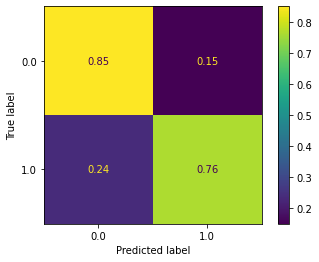

In [20]:
ConfusionMatrixDisplay.from_predictions(target, predicts, normalize='true')

## crush test

тест на данных до 19 ноября. Распределение спроса и предложения там другое, поэтому метрика должна быть хуже.

In [3]:
# check metric
model = pickle.load(open('model.pkl', 'rb'))
# model = dill.load(open('model.dill', 'rb'))

# select part of train
train = pd.read_csv(data_folder.joinpath('data_train.csv')).drop('Unnamed: 0', axis=1)
train = train[train['buy_time'] < dt.datetime.fromisoformat('2018-11-19').timestamp()]

data = train.drop('target', axis=1)
target = train['target']

predicts = model.predict(data)
f1_score(target, predicts, average='macro')

0.6297104793874788

In [ ]:
#